In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N=100
header = ["objid", "ra", "dec", "g", "r", "redshift", "velDisp", "velDispErr"]
file_name = ["./Gal_vdisp/cl"+str(i)+".csv" for i in range(1,N+1)]
gal_info = []
for i in range(N):
    temp = pd.read_csv(file_name[i],header=1)
    gal_info.append(temp)
gal_info[80].head()

,objid,ra,dec,g,r,redshift,velDisp,velDispErr
0,1237662503218839839,236.241334,36.188205,18.00120,17.15565,0.063322,79.42507,8.271468
1,1237662503218839974,236.241435,36.068830,16.59626,15.71089,0.059999,243.95990,9.138569
2,1237662473690939568,236.333183,36.342983,17.79487,16.89650,0.066088,123.44910,9.815120
3,1237662473691005104,236.361951,36.155027,17.53033,16.69919,0.068890,95.42009,7.159356
4,1237662503218839651,236.254179,36.106436,17.42578,16.53966,0.065156,135.04910,6.804585


In [148]:
cls_info = pd.read_csv('./GalWCls19_summary.csv',index_col=0)
cls_info

,RA (deg),DEC (deg),cluster redshift,radial velocity(km/s),Comoving Distance(Mpc/h),r_200(Mpc/h),N_200,sigma_200(km/s),lower error in sigma_200(km/s),upper error in sigma_200(km/s),"M_200 cls mass (10^14 M_sun, NFW)","error in M_200 cls mass (10^14 M_sun, NFW)",R_s (Mpc/h),error in r_s (Mpc/h),"M_s (10^14 M_sun, NFW)","error in M_s (10^14 M_sun, NFW)"
ID,,,,,,,,,,,,,,,,
1,230.65973,27.743846,0.073177,21137.1930,215.714310,1.758845,167,1042.08600,-83.233978,100.849290,1.350000e+15,3.570000e+14,0.41,0.108,3.060000e+14,8.060000e+13
2,227.55402,33.498096,0.113908,32215.0730,332.547940,1.511349,63,926.75761,-92.042355,118.740250,8.950000e+14,2.350000e+14,0.32,0.084,1.880000e+14,4.930000e+13
3,194.93502,27.912461,0.023372,6924.9620,69.697942,1.544850,672,932.60305,-47.761507,55.312723,8.760000e+14,2.230000e+14,0.33,0.084,1.850000e+14,4.710000e+13
4,258.20851,64.052953,0.080997,23301.8680,238.327350,1.453410,155,881.24884,-70.222098,82.083225,7.700000e+14,2.080000e+14,0.37,0.100,1.860000e+14,5.040000e+13
5,209.83093,27.968947,0.075065,21661.5240,221.182270,1.448992,77,842.65332,-83.231049,96.160155,7.590000e+14,2.170000e+14,0.14,0.040,9.660000e+13,2.760000e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,124.92122,21.032812,0.093382,26693.3160,273.964500,0.689068,10,387.83579,-76.069234,103.545850,8.310000e+13,4.650000e+13,0.05,0.028,9.110000e+12,5.100000e+12
997,134.80258,39.671084,0.027620,8165.9917,82.285446,0.703441,12,449.75002,-251.333430,196.605620,8.300000e+13,3.320000e+13,0.04,0.016,8.110000e+12,3.240000e+12
998,164.50680,1.634841,0.039362,11568.5010,116.952150,0.700718,51,421.30468,-72.371673,106.786410,8.290000e+13,2.330000e+13,0.37,0.104,3.930000e+13,1.100000e+13


In [149]:
print(min(gal_info[1]['g']))
bcg1 = gal_info[1][gal_info[1]['g']==min(gal_info[1]['g'])]
bcg1_rmag = bcg1['r'].values[0]
print(bcg1_rmag)

16.702779999999997
15.673570000000002


In [179]:
bcg_r = []
bcg_vdisp = []
bcg_vdispErr = []
for i in range(N):
    if gal_info[i].size==0:
        print(i)
    bcg = gal_info[i][gal_info[i]['r']==min(gal_info[i]['r'])]
    bcg_r.append(bcg['r'].values[0])
    bcg_vdisp.append(math.log10(bcg['velDisp'].values[0]/100))
    bcg_vdispErr.append(bcg['velDispErr'].values[0]/100)

In [180]:
cls_M200 = []
cls_dist = []
dist_list = cls_info['Comoving Distance(Mpc/h)'].values
M200_list = cls_info['M_200 cls mass (10^14 M_sun, NFW)'].values
for i in range(N):
    M200 = math.log10(float(M200_list[i])/math.pow(10,14))
    cls_M200.append(M200)
    cls_dist.append(float(dist_list[i]))

In [181]:
print(type(bcg_r))
print(type(cls_M200))
print(len(bcg_r))
print(len(cls_M200))
print(cls_dist)

<class 'list'>
<class 'list'>
100
100
[215.71431, 332.54794, 69.697942, 238.32735, 221.18227000000002, 230.70156, 257.97033, 332.12625, 263.63749, 110.0802, 249.53999, 293.38992, 297.68408999999997, 400.75866, 225.51655, 164.30491, 90.358462, 358.79256000000004, 253.63715, 403.73503, 337.77419, 276.77311000000003, 227.48002999999997, 490.08264, 278.44993, 278.43476, 420.56785999999994, 253.10873999999998, 263.95552000000004, 241.33821, 374.90823, 131.35246, 210.20118, 106.60003999999999, 247.05371, 303.20479, 214.25832999999997, 259.2818, 287.53025, 252.79583, 442.70147000000003, 411.24052, 69.188812, 208.50248, 302.4949, 299.19422000000003, 233.06562000000002, 212.36195, 325.22681, 217.39678999999998, 318.62534, 238.80608999999998, 245.21152, 203.04301, 432.65724000000006, 289.07017, 162.04876000000002, 288.6974, 252.44544, 65.42662800000001, 225.27196, 432.88079000000005, 146.31991000000002, 547.26322, 289.12212, 229.42925, 211.6039, 265.14553, 225.20914, 179.97986, 533.64098, 228.84

In [182]:
def abs_mag(mag, r):
    return mag-25-5*math.log10(r*0.678)

bcg_abs_r = [abs_mag(bcg_r[i], cls_dist[i]) for i in range(N)]
print(bcg_abs_r)

[-24.31124325020027, -21.09184977883443, -21.857948242806778, -21.39490788947104, -20.950570023959425, -20.744341125449694, -21.95126726546441, -21.96457447905899, -21.737464310447827, -21.477354519051286, -20.988329236059187, -22.410814412857, -21.51760658932995, -21.737363048353657, -21.63779056426179, -20.571621178599617, -21.055002620052505, -20.41706561354166, -21.592942792244514, -20.670940631988707, -21.197370775308617, -21.286707938253514, -21.492544853609132, -20.941055064068067, -21.808484034574143, -20.771085729161726, -21.557198872451764, -20.82882417869507, -21.204862212660153, -20.985138905618292, -20.44317334021281, -22.020179523176488, -20.674474217759574, -20.709545307599342, -20.31812536965962, -21.885808759117854, -22.09378704711217, -20.668318634420487, -21.239836179106767, -21.865647998104496, -20.72665328966358, -21.590377967479363, -20.667307837609766, -21.417624594275317, -21.70963875402108, -20.827154465993424, -20.344689542097175, -21.763361992178737, -20.1907

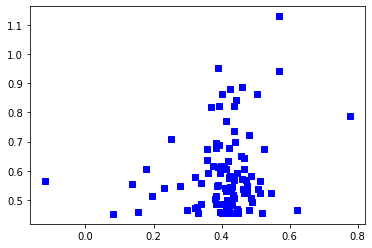

In [183]:
plt.plot(bcg_vdisp, cls_M200,'bs')
plt.show()